In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryclassification/data.csv


In [7]:
input_path = '../input/binaryclassification/data.csv'
input_data = pd.read_csv(input_path)
data = input_data.head()
print(data)

   label       f1    f2   f3  f4  f5  f6  f7    f8  f9  ...  f19  f20  f21  \
0      1  4438827  2858   95  20   0   1   0   790   1  ...    0    0    0   
1      1  4145089  4728  199  10   0   0   6  1821   0  ...    0    0    0   
2      1  4409677  1240   35   6   0   0   0   132   1  ...    0    0    0   
3      1  4705142  6249  152   7   0   0  10   269   0  ...    0    0    0   
4      1  4424842  4446   78  21   0   0   0   615   1  ...    0    0    0   

   f22  f23  f24  f25  f26  f27  f28  
0    9    3    0    0    0    0    0  
1    1    1    0    0    0    0    0  
2    2    0    0    0    0    0    0  
3    1    1    0    0    0    0    0  
4    3    3    0    0    0    0    0  

[5 rows x 29 columns]


In [8]:
input_data.shape
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   50000 non-null  int64
 1   f1      50000 non-null  int64
 2   f2      50000 non-null  int64
 3   f3      50000 non-null  int64
 4   f4      50000 non-null  int64
 5   f5      50000 non-null  int64
 6   f6      50000 non-null  int64
 7   f7      50000 non-null  int64
 8   f8      50000 non-null  int64
 9   f9      50000 non-null  int64
 10  f10     50000 non-null  int64
 11  f11     50000 non-null  int64
 12  f12     50000 non-null  int64
 13  f13     50000 non-null  int64
 14  f14     50000 non-null  int64
 15  f15     50000 non-null  int64
 16  f16     50000 non-null  int64
 17  f17     50000 non-null  int64
 18  f18     50000 non-null  int64
 19  f19     50000 non-null  int64
 20  f20     50000 non-null  int64
 21  f21     50000 non-null  int64
 22  f22     50000 non-null  int64
 23  f23     500

In [9]:
input_data.describe()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,0.268440,4.489459e+06,1.528918e+04,2.093005e+03,4.949580,0.097180,0.055020,8.501107e+02,700.512440,7.29386,...,11.241480,0.527280,4.106220,1.559380,4.429800,0.000260,0.001380,0.001320,0.000580,0.00024
std,0.443152,7.211621e+05,6.022829e+05,5.454755e+04,311.302315,0.437058,0.275743,1.006631e+05,7886.279322,181.26620,...,1393.891975,79.626193,73.522097,6.156446,16.492674,0.016123,0.048354,0.040967,0.034924,0.01549
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,4.123857e+06,3.400000e+01,1.000000e+01,0.000000,0.000000,0.000000,1.000000e+00,9.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,4.627590e+06,6.900000e+01,1.600000e+01,0.000000,0.000000,0.000000,6.000000e+00,41.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,4.992968e+06,1.860000e+02,2.800000e+01,2.000000,0.000000,0.000000,2.900000e+01,217.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,7.126222e+06,5.976436e+07,9.613889e+06,66683.000000,19.000000,7.000000,2.243578e+07,498925.000000,21319.00000,...,205859.000000,16454.000000,9791.000000,142.000000,439.000000,1.000000,3.000000,2.000000,3.000000,1.00000


In [10]:
input_data["label"].value_counts()

0    36578
1    13422
Name: label, dtype: int64

In [11]:
input_data.isnull().sum()

label    0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
f28      0
dtype: int64

In [12]:
input_data["f21"].value_counts()

0      48279
1        324
2        135
4         93
3         92
       ...  
882        1
722        1
338        1
242        1
624        1
Name: f21, Length: 363, dtype: int64

In [13]:
x=input_data.drop(labels=['label'],axis=1)
y = input_data['label']
x.head(2)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,4438827,2858,95,20,0,1,0,790,1,0,...,0,0,0,9,3,0,0,0,0,0
1,4145089,4728,199,10,0,0,6,1821,0,0,...,0,0,0,1,1,0,0,0,0,0


In [14]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00002000e+00 -1.03857505e-01 -9.77919959e-02  3.12436608e-03
   1.33181897e-01 -6.28513829e-02 -3.09799482e-02  4.01708655e-03
   9.03210745e-03 -1.17824428e-03 -1.38156207e-02  1.70872571e-03
   1.89782002e-02 -4.97337747e-02  5.22323419e-03  0.00000000e+00
   5.22323419e-03  2.09790088e-01 -1.17299279e-03 -8.49257589e-03
   4.85549725e-02  2.18564208e-01  1.07619898e-01  1.75572520e-02
   1.42975198e-02  2.31657755e-02  8.23209353e-03  1.68979188e-02]
 [-1.03857505e-01  1.00002000e+00  1.25471493e-01  1.38134136e-02
   3.64312115e-02  1.25497606e-02  2.77041133e-03  7.35450149e-03
   3.32182613e-03  7.09369929e-04  5.91692892e-03  2.17039553e-04
   3.05321272e-03  4.10889047e-03 -1.74241696e-04  0.00000000e+00
  -1.74241696e-04 -5.47402266e-03 -2.03089127e-04  7.44900480e-04
  -1.20648063e-03 -3.18071602e-03 -4.92394755e-03 -3.19909059e-04
  -6.47379165e-04 -7.26869314e-04 -3.76844372e-04 -3.00307046e-04]
 [-9.77919959e-02  1.25471493e-01  1.00002000e+00 -3.29

In [16]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00002000e+00 -1.03857505e-01 -9.77919959e-02  3.12436608e-03
   1.33181897e-01 -6.28513829e-02 -3.09799482e-02  4.01708655e-03
   9.03210745e-03 -1.17824428e-03 -1.38156207e-02  1.70872571e-03
   1.89782002e-02 -4.97337747e-02  5.22323419e-03  0.00000000e+00
   5.22323419e-03  2.09790088e-01 -1.17299279e-03 -8.49257589e-03
   4.85549725e-02  2.18564208e-01  1.07619898e-01  1.75572520e-02
   1.42975198e-02  2.31657755e-02  8.23209353e-03  1.68979188e-02]
 [-1.03857505e-01  1.00002000e+00  1.25471493e-01  1.38134136e-02
   3.64312115e-02  1.25497606e-02  2.77041133e-03  7.35450149e-03
   3.32182613e-03  7.09369929e-04  5.91692892e-03  2.17039553e-04
   3.05321272e-03  4.10889047e-03 -1.74241696e-04  0.00000000e+00
  -1.74241696e-04 -5.47402266e-03 -2.03089127e-04  7.44900480e-04
  -1.20648063e-03 -3.18071602e-03 -4.92394755e-03 -3.19909059e-04
  -6.47379165e-04 -7.26869314e-04 -3.76844372e-04 -3.00307046e-04]
 [-9.77919959e-02  1.25471493e-01  1.00002000e+0

In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.71505769e-02  2.21436948e-01 -1.02064066e-01 -1.33771164e-01
  -1.18229364e-01 -7.81400505e-04  2.91748225e-03  8.37574546e-03
  -6.68128699e-03 -5.27413657e-02  2.73726660e-02 -5.63234951e-02
   2.42536064e-01  3.02355798e-01  2.44723009e-01 -5.39619537e-02
   8.03375585e-01  8.21702762e-02 -8.74616637e-02  4.11320649e-02
   6.56400996e-02  3.89974984e-02 -5.18907580e-02  1.17174868e-01
  -5.11206251e-02  4.11866877e-02 -1.05808382e-20  0.00000000e+00]
 [-7.56306082e-04 -6.23577865e-03  1.10313997e-02  3.01990167e-02
   3.64551956e-02 -1.23918052e-05 -7.10791959e-03  7.58584272e-03
  -8.62988141e-04  1.44622819e-03 -3.46810892e-03  4.26224241e-02
   5.81755609e-02 -3.04633211e-01 -4.63128365e-01  1.39491443e-01
   3.59361257e-01 -5.75654085e-01  3.10674301e-02  1.04877622e-01
  -9.14235781e-02  9.66194194e-02  5.05934474e-02  5.59272173e-03
   3.75655860e-01 -1.77882628e-01 -3.68728035e-17  0.00000000e+00]
 [-1.54339298e-03 -1.22347455e-02  1.25411121e-02  2.6601648

In [18]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.036449092258719
2.304540879767935
2.0046340213974707
1.8171037216298989
1.7260072177643553
1.2648917030706326
1.1958431059392804
1.181453750428968
1.0604660268186175
1.0219427287267377
1.0050835548277801
1.0027829047738654
0.996044372854013
0.994225287494302
0.9837277780763517
0.8837221367784034
0.8580681805024869
0.825523342012738
0.6752002230099812
0.5122883966029594
0.4343747235046678
0.3761732695431772
0.31293272196106775
0.2531978824339425
0.23484728308580274
0.03901570553610624
1.559589826344306e-17
0.0


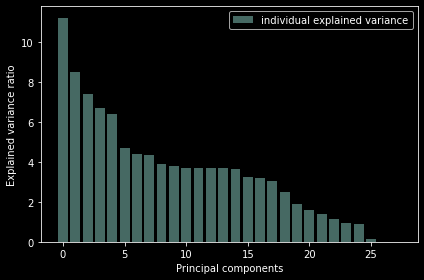

In [21]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(28), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [22]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(28,1), 
                      eig_pairs[1][1].reshape(28,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 2.71505769e-02  2.21436948e-01]
 [-7.56306082e-04 -6.23577865e-03]
 [-1.54339298e-03 -1.22347455e-02]
 [ 1.59209197e-03  2.25922135e-02]
 [ 5.61098889e-02  4.62017177e-01]
 [ 4.23148783e-02  1.70846271e-01]
 [ 1.23194663e-03  1.71783232e-02]
 [ 1.16852125e-02  1.54013890e-01]
 [ 3.66811486e-03  2.37592044e-02]
 [ 2.19041334e-03  2.17038581e-02]
 [-4.60226391e-04  1.46161462e-03]
 [ 2.84470607e-03  7.40201847e-02]
 [ 1.89373465e-02  1.41084485e-01]
 [ 4.30821693e-02  1.69998572e-01]
 [ 5.85640563e-03  1.56215916e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.85640563e-03  1.56215916e-01]
 [ 2.13973553e-02  4.73942231e-01]
 [ 9.70614589e-04  3.81707792e-02]
 [-2.55054260e-04 -3.15216610e-04]
 [ 3.04537591e-03  5.52488870e-02]
 [ 3.58858816e-02  5.53567243e-01]
 [ 3.72031571e-02  1.86251490e-01]
 [ 4.53949269e-01 -5.75603930e-02]
 [ 4.21010289e-01 -2.74811660e-02]
 [ 4.25992903e-01 -2.14646258e-02]
 [ 4.60273587e-01 -3.66875376e-02]
 [ 4.60531485e-01 -5.78181199e-02]]


Text(0, 0.5, 'Cumulative explained variance')

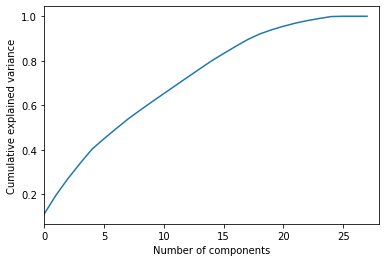

In [23]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,28,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [25]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=28)
x_pca  = sklearn_pca.fit_transform(X_std)

print(x_pca )

[[ 1.69939698e-01  1.21482016e+00  5.83552778e-01 ...  7.08660739e-04
  -1.30646993e-15  1.65121953e-16]
 [-1.02556537e-01 -4.47700931e-01  5.65637806e-02 ... -2.65737840e-04
   9.61451108e-16 -4.12109789e-17]
 [-9.15280580e-02 -3.21225240e-01 -2.62583900e-03 ... -3.36316542e-04
  -1.06512491e-15  5.69931525e-17]
 ...
 [-8.78617766e-02 -3.89326743e-01  4.00865318e-03 ... -9.87936365e-04
  -2.20158486e-17  9.02343161e-19]
 [-8.84155097e-02 -3.87410924e-01 -1.02222279e-03 ... -1.06320723e-03
  -2.18384354e-17  8.41344494e-19]
 [-9.29975030e-02 -4.26169014e-01  1.60260419e-02 ... -9.33679615e-04
  -2.31365519e-17  9.81409566e-19]]


In [26]:
x_pca.shape

(50000, 28)

In [27]:
y.shape

(50000,)

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with 20% test rate
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Training model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=101)
RFC.fit(X_train,y_train)

y_pred = RFC.predict(X_test)
# Import 4 metrics from sklearn for testing
from sklearn.metrics import accuracy_score
print ("Accuracy on testing data of RandomForestClassifier: {:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy on testing data of RandomForestClassifier: 0.9959


In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[7309,    6],
       [  35, 2650]])

In [30]:
roc=metrics.classification_report(y_test,y_pred)
roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7315\n           1       1.00      0.99      0.99      2685\n\n    accuracy                           1.00     10000\n   macro avg       1.00      0.99      0.99     10000\nweighted avg       1.00      1.00      1.00     10000\n'

In [31]:
roc_score = metrics.roc_auc_score(y_test,y_pred)
roc_score

0.9930721929251773

In [32]:
from sklearn.metrics import roc_curve, auc
FPR, TPR, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(FPR, TPR)
roc_auc

0.9930721929251773

Text(0.5, 0, 'False Positive Rate')

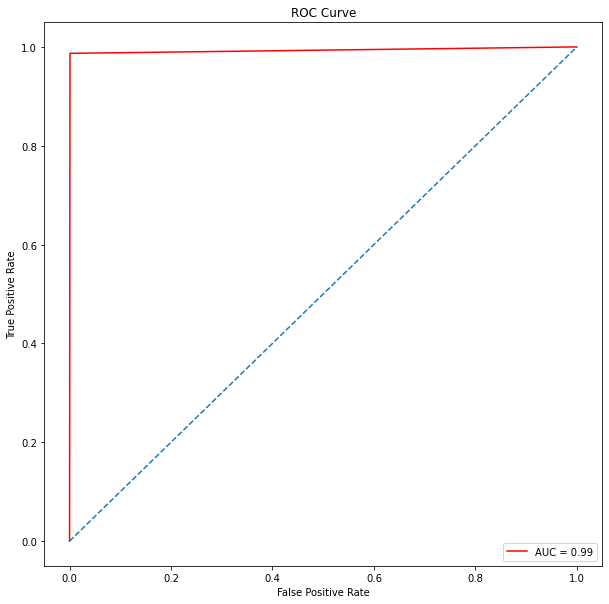

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC Curve')
plt.plot(FPR, TPR, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')